<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/notebooks/Practica-1-MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Conectar la notebook en modo GPU

Entorno de ejecución → Cambiar tipo de entorno de ejecución

Algunas consideraciones:

* No dejar la notebook conectada sin actividad ya que Colab penaliza esto al asignar un entorno con GPU.
* No pedir el entorno con GPU si no se va a usar.

---

# ⭕ Parte I

Usando el mismo dataset MNIST de Keras, implementa las siguientes redes neuronales de tipo MLP:

* 1 capa oculta de 200 neuronas sin activación. Entrena durante 30 épocas.
* 1 capa oculta de 200 neuronas con activación $tanh$. Entrena durante 30 épocas.
* 3 capas ocultas de 100, 200 y 100 neuronas respectivamente, todas con activación ReLU. Entrena durante 50 épocas.

En cada uno de los experimentos determina las especificaciones de las capas de entrada y salida. Además, en cada caso, reporta el accuracy y recall en el conjunto de prueba, así como las curvas de entrenamiento (perdida y accuracy).

* Con el objetivo de subir la métrica de accuracy en el conjunto de prueba, entrena un nuevo módelo de red neuronal MLP cambiando los siguientes hiperparámetros:

 * Número de capas ocultas.
 * Número de neuronas en cada capa oculta.
 * Función de activación de cada capa oculta.
 * Optimizador ([opciones](https://keras.io/api/optimizers/)).


---


Como referencia, el mejor resultado hasta ahora, sin usar redes convolucionales, es un accuracy de 99.65% (https://arxiv.org/abs/1003.0358)

Lista de resultados: http://yann.lecun.com/exdb/mnist/, https://paperswithcode.com/sota/image-classification-on-mnist

## El conjunto de datos

In [1]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_test_original = y_test.copy()  # Esta copia la usarás para hacer las evaluaciones de las métricas de rendimiento


X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

11490434/11490434 [==============================] - 3s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000, 10)
X_test shape: (10000, 28, 28)
y_test shape: (10000, 10)


## Tu trabajo

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


# Sin activación 1 capa 200 neuronas
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(200, input_shape=(28*28,), activation=None))
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)

# Evaluar el modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]*100}%")


Epoch 1/30
300/300 - 1s - loss: 0.4048 - accuracy: 0.8851 - val_loss: 0.2848 - val_accuracy: 0.9191 - 1s/epoch - 4ms/step
Epoch 2/30
300/300 - 1s - loss: 0.2911 - accuracy: 0.9184 - val_loss: 0.2753 - val_accuracy: 0.9227 - 685ms/epoch - 2ms/step
Epoch 3/30
300/300 - 1s - loss: 0.2786 - accuracy: 0.9219 - val_loss: 0.2772 - val_accuracy: 0.9256 - 628ms/epoch - 2ms/step
Epoch 4/30
300/300 - 1s - loss: 0.2722 - accuracy: 0.9236 - val_loss: 0.2755 - val_accuracy: 0.9235 - 638ms/epoch - 2ms/step
Epoch 5/30
300/300 - 1s - loss: 0.2681 - accuracy: 0.9259 - val_loss: 0.2782 - val_accuracy: 0.9242 - 653ms/epoch - 2ms/step
Epoch 6/30
300/300 - 1s - loss: 0.2641 - accuracy: 0.9262 - val_loss: 0.2839 - val_accuracy: 0.9234 - 652ms/epoch - 2ms/step
Epoch 7/30
300/300 - 1s - loss: 0.2619 - accuracy: 0.9276 - val_loss: 0.2738 - val_accuracy: 0.9263 - 697ms/epoch - 2ms/step
Epoch 8/30
300/300 - 1s - loss: 0.2586 - accuracy: 0.9291 - val_loss: 0.2773 - val_accuracy: 0.9257 - 675ms/epoch - 2ms/step
Epo

313/313 [==============================] - 0s 944us/step
Recall: 92.37926859090925%


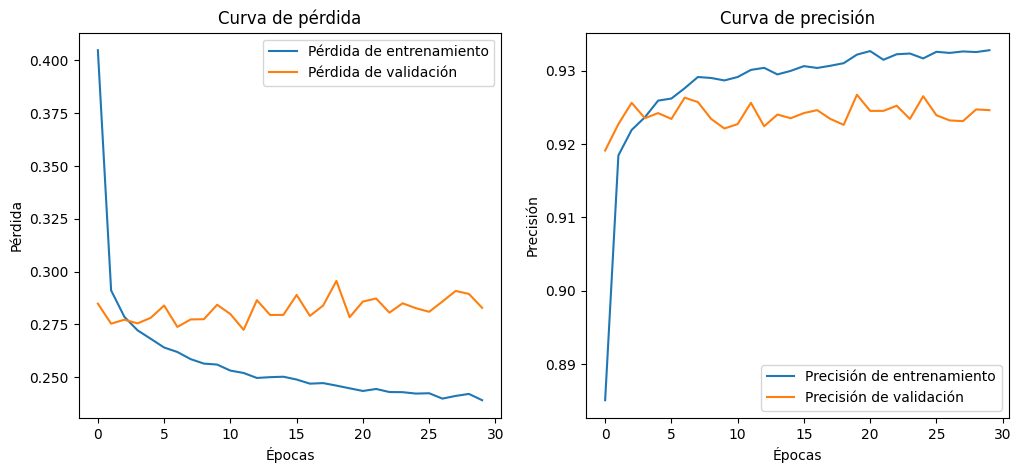

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                                 
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [3]:
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular recall
recall = recall_score(y_test_original, y_pred_classes, average='macro')
print(f"Recall: {recall*100}%")

# Graficar curvas de entrenamiento
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


model.summary()

plot_model(model, to_file='model_architecture.png', show_shapes=True,
           show_layer_names=True, dpi=100)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


# tanh activación 1 capa 200 neuronas
model_tan = Sequential()
model_tan.add(Flatten(input_shape=(28, 28)))
model_tan.add(Dense(200, input_shape=(28*28,), activation='tanh'))
model_tan.add(Dense(10, activation='softmax'))

# Compilar el modelo
model_tan.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_tan = model_tan.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)

# Evaluar el modelo
scores = model_tan.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]*100}%")

Epoch 1/30
300/300 - 3s - loss: 0.3857 - accuracy: 0.8916 - val_loss: 0.2380 - val_accuracy: 0.9332 - 3s/epoch - 12ms/step
Epoch 2/30
300/300 - 1s - loss: 0.2122 - accuracy: 0.9394 - val_loss: 0.1755 - val_accuracy: 0.9492 - 936ms/epoch - 3ms/step
Epoch 3/30
300/300 - 1s - loss: 0.1577 - accuracy: 0.9553 - val_loss: 0.1409 - val_accuracy: 0.9595 - 1s/epoch - 4ms/step
Epoch 4/30
300/300 - 2s - loss: 0.1242 - accuracy: 0.9647 - val_loss: 0.1216 - val_accuracy: 0.9641 - 2s/epoch - 6ms/step
Epoch 5/30
300/300 - 2s - loss: 0.0991 - accuracy: 0.9726 - val_loss: 0.1066 - val_accuracy: 0.9675 - 2s/epoch - 6ms/step
Epoch 6/30
300/300 - 2s - loss: 0.0821 - accuracy: 0.9768 - val_loss: 0.1011 - val_accuracy: 0.9698 - 2s/epoch - 6ms/step
Epoch 7/30
300/300 - 2s - loss: 0.0680 - accuracy: 0.9811 - val_loss: 0.0855 - val_accuracy: 0.9745 - 2s/epoch - 6ms/step
Epoch 8/30
300/300 - 3s - loss: 0.0574 - accuracy: 0.9844 - val_loss: 0.0816 - val_accuracy: 0.9746 - 3s/epoch - 11ms/step
Epoch 9/30
300/300 

313/313 [==============================] - 1s 4ms/step
Recall: 97.95920148127915%


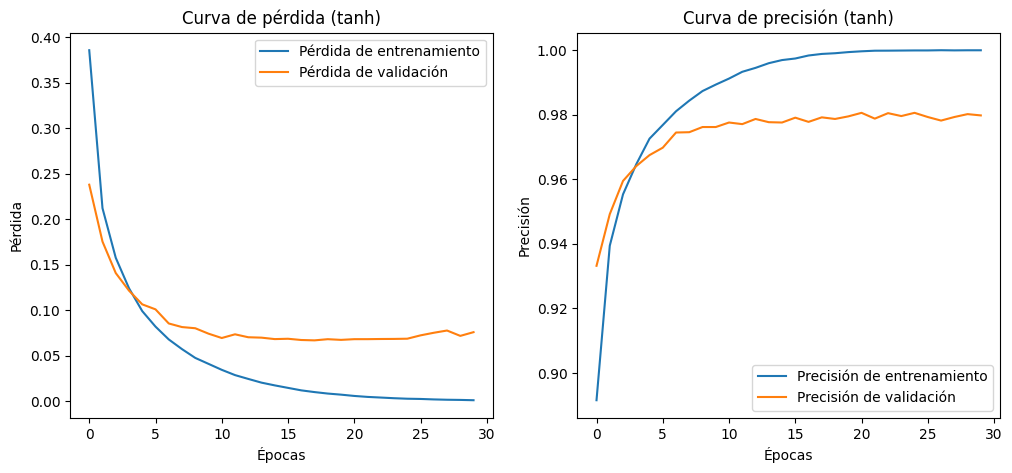

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 200)               157000    
                                                                 
 dense_9 (Dense)             (None, 10)                2010      
                                                                 
Total params: 159010 (621.13 KB)
Trainable params: 159010 (621.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


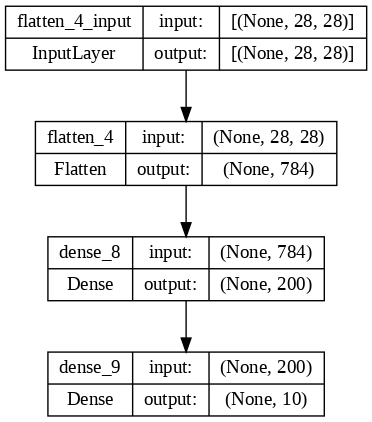

In [ ]:
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Predicciones
y_pred = model_tan.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular recall
recall = recall_score(y_test_original, y_pred_classes, average='macro')
print(f"Recall: {recall*100}%")

# Graficar curvas de entrenamiento
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history_tan.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_tan.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de pérdida (tanh)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history_tan.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_tan.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de precisión (tanh)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


model_tan.summary()

plot_model(model_tan, to_file='model_architecture.png', show_shapes=True,
           show_layer_names=True, dpi=100)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


# RELu activación 3 capas 100 200 100 neuronas 50 epocs
model_relu = Sequential()
model_relu.add(Flatten(input_shape=(28, 28)))
model_relu.add(Dense(100, activation='relu'))
model_relu.add(Dense(200, activation='relu'))
model_relu.add(Dense(100, activation='relu'))
model_relu.add(Dense(10, activation='softmax'))

# Compilar el modelo
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_relu = model_relu.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size= 200, verbose=2)

# Evaluar el modelo
scores = model_relu.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]*100}%")


Epoch 1/50
300/300 - 3s - loss: 0.3566 - accuracy: 0.8982 - val_loss: 0.1606 - val_accuracy: 0.9525 - 3s/epoch - 10ms/step
Epoch 2/50
300/300 - 1s - loss: 0.1333 - accuracy: 0.9609 - val_loss: 0.1168 - val_accuracy: 0.9635 - 1s/epoch - 4ms/step
Epoch 3/50
300/300 - 2s - loss: 0.0951 - accuracy: 0.9711 - val_loss: 0.0931 - val_accuracy: 0.9705 - 2s/epoch - 5ms/step
Epoch 4/50
300/300 - 2s - loss: 0.0704 - accuracy: 0.9782 - val_loss: 0.1004 - val_accuracy: 0.9694 - 2s/epoch - 7ms/step
Epoch 5/50
300/300 - 2s - loss: 0.0565 - accuracy: 0.9826 - val_loss: 0.0828 - val_accuracy: 0.9759 - 2s/epoch - 6ms/step
Epoch 6/50
300/300 - 2s - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.0854 - val_accuracy: 0.9751 - 2s/epoch - 6ms/step
Epoch 7/50
300/300 - 2s - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0802 - val_accuracy: 0.9774 - 2s/epoch - 6ms/step
Epoch 8/50
300/300 - 2s - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0842 - val_accuracy: 0.9762 - 2s/epoch - 7ms/step
Epoch 9/50
300/300 - 1s

313/313 [==============================] - 1s 4ms/step
Recall: 98.33701200871295%


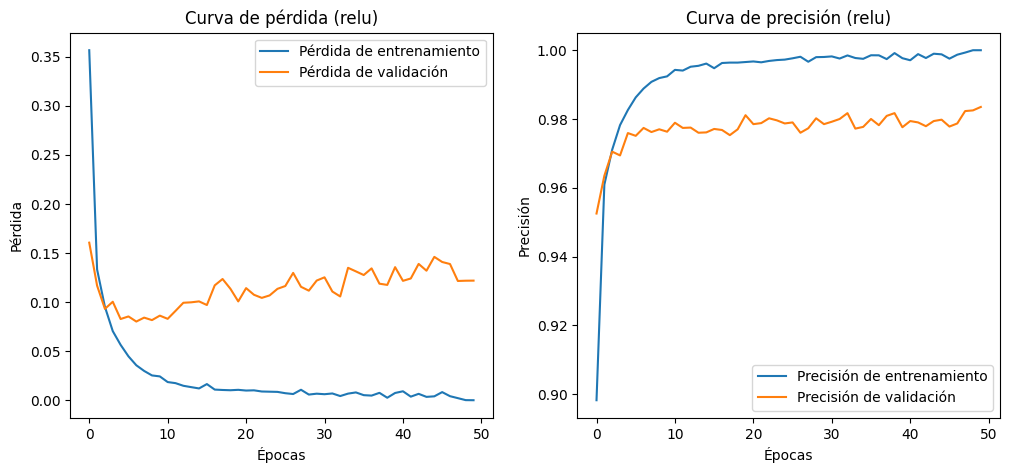

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 200)               20200     
                                                                 
 dense_20 (Dense)            (None, 100)               20100     
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 119810 (468.01 KB)
Trainable params: 119810 (468.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


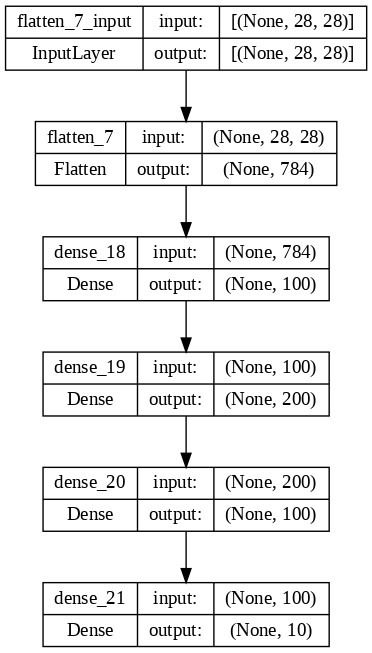

In [ ]:
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Predicciones
y_pred = model_relu.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular recall
recall = recall_score(y_test_original, y_pred_classes, average='macro')
print(f"Recall: {recall*100}%")

# Graficar curvas de entrenamiento
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history_relu.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_relu.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de pérdida (relu)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history_relu.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_relu.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de precisión (relu)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


model_relu.summary()

plot_model(model_relu, to_file='model_architecture.png', show_shapes=True,
           show_layer_names=True, dpi=100)

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


# RELu activación 3 capas 100 200 100 neuronas 50 epocs
model_new = Sequential()
model_new.add(Flatten(input_shape=(28, 28)))
# model_new.add(Dense(128, activation='relu'))
# model_new.add(Dense(256, activation='relu'))
# model_new.add(Dense(128, activation=None))
model_new.add(Dense(100, activation='tanh'))
model_new.add(Dense(10, activation='softmax'))

# Compilar el modelo
model_new.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_new = model_new.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size= 200, verbose=2)

# Evaluar el modelo
scores = model_new.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]*100}%")


Epoch 1/50
300/300 - 1s - loss: 0.4081 - accuracy: 0.8889 - val_loss: 0.2436 - val_accuracy: 0.9285 - 1s/epoch - 4ms/step
Epoch 2/50
300/300 - 1s - loss: 0.2163 - accuracy: 0.9380 - val_loss: 0.1813 - val_accuracy: 0.9491 - 582ms/epoch - 2ms/step
Epoch 3/50
300/300 - 1s - loss: 0.1647 - accuracy: 0.9533 - val_loss: 0.1519 - val_accuracy: 0.9546 - 581ms/epoch - 2ms/step
Epoch 4/50
300/300 - 1s - loss: 0.1337 - accuracy: 0.9620 - val_loss: 0.1279 - val_accuracy: 0.9640 - 588ms/epoch - 2ms/step
Epoch 5/50
300/300 - 1s - loss: 0.1120 - accuracy: 0.9688 - val_loss: 0.1159 - val_accuracy: 0.9671 - 584ms/epoch - 2ms/step
Epoch 6/50
300/300 - 1s - loss: 0.0955 - accuracy: 0.9732 - val_loss: 0.1020 - val_accuracy: 0.9696 - 581ms/epoch - 2ms/step
Epoch 7/50
300/300 - 1s - loss: 0.0826 - accuracy: 0.9777 - val_loss: 0.0968 - val_accuracy: 0.9721 - 667ms/epoch - 2ms/step
Epoch 8/50
300/300 - 1s - loss: 0.0728 - accuracy: 0.9801 - val_loss: 0.0920 - val_accuracy: 0.9735 - 609ms/epoch - 2ms/step
Epo

313/313 [==============================] - 1s 2ms/step
Recall: 97.72327456513258%


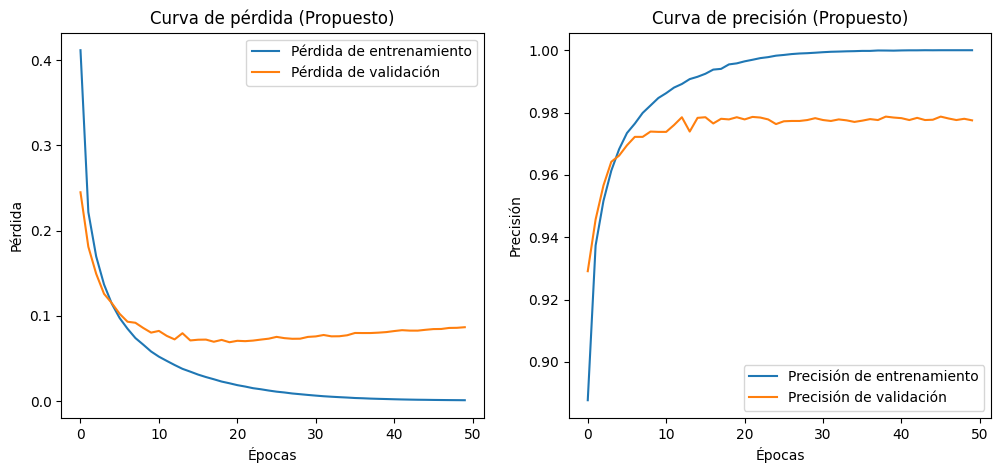

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


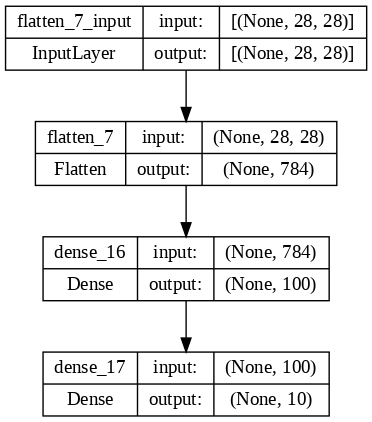

In [ ]:
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Predicciones
y_pred = model_new.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular recall
recall = recall_score(y_test_original, y_pred_classes, average='macro')
print(f"Recall: {recall*100}%")

# Graficar curvas de entrenamiento
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history_new.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_new.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de pérdida (Propuesto)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history_new.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_new.history['val_accuracy'], label='Precisión de validación')
plt.title('Curva de precisión (Propuesto)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


model_new.summary()

plot_model(model_new, to_file='model_architecture.png', show_shapes=True,
           show_layer_names=True, dpi=100)

# ⭕ Parte II

Tomando como referencia la [notebook](https://github.com/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/notebooks/02-MLP-Regresion.ipynb) de MLP para regresión, realiza las siguientes tareas. En las primeras 5 tareas el objetivo es experimentar y reflexionar sobre el efecto de distintos aspectos del entrenamiento en el rendimiento del modelo.

1. Repite el entrenamiendo del modelo usando 100 épocas **sin normalizar los datos**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento? \

2. Repite el entrenamiendo del modelo usando 100 épocas, normalización de los datos y **con alguna función de activación en la capa de salida (tanh o sigmoide)**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

3. Repite el entrenamiendo del modelo usando 100 épocas, normalización de los datos y **con la función de activación ReLU en la capa de salida**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

4. Comprueba el modelo que entrenamos en la notebook (con 100 épocas, normalización y sin función de activación en la salida) con los siguientes algoritmos de ML clásico:
 * Regresión Lineal
 * Regresión Polinomial
 * Regresor KNN
 Comprueba los modelos usando MAE en el conjunto de prueba. ¿Cuál tuvo mejor desempeño?  

El objetivo en la siguiente tarea es experimentar para encontrar un mejor modelo que suba las métricas de rendimiento del modelo. **Cuidado con el overfitting.**

5. Usando los datos normalizados, prueba con diferentes combinaciones de los parámetros del módelo:
    * Número de capas ocultas
    * Número de nueronas en las capas ocultas
    * Funciones de activación de las capas ocultas
    * Optimizador y tasa de entrenamiento

 Puedes hacer el modelo más sencillo o más complejo. Reporta la combinación de parámetros que produjo el mejor resultado.

En esta última tarea probaras cómo es recibir nuevos datos para realizar predicciones con tu mejor modelo que hayas obtenido.

6. Ya que tengas tu mejor modelo, toma el archivo `mpg_new_data.csv` del repositorio y obten las predicciones para estos datos. Compararemos contra los valores reales. **Guarda estas predicciones en un archivo CSV, que también adjuntarás en la entrega de la actividad**.

## El conjunto de datos

Cargamos, limpiamos y separamos los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/04%20Deep%20Learning/data/auto-mpg.data"

df = pd.read_csv(url,
                header=0,
                index_col=0,
                na_values = "?",
                comment='\t',
                skipinitialspace=True)

df = df.dropna()
df = pd.get_dummies(data=df,columns=['Origin'],
                       drop_first=True,dtype=int)
df.rename(columns={'Origin_2':'Europe',
                   'Origin_3':'Japan'},
             inplace=True)
display(df)

X = df.iloc[:,1:].values
y = df['MPG'].values

print(f"Shapes de X y y: {X.shape}, {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85,random_state=189)

print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
391,36.0,4,135.0,84.0,2370.0,13.0,82,0,0
392,27.0,4,151.0,90.0,2950.0,17.3,82,0,0
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0


Shapes de X y y: (390, 8), (390,)
Train size: 331
Test size: 59


In [2]:
def build_model(activation_final, X_train):
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation = activation_final)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [4]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(history.epoch, history.history['mae'],
            label='Train Error')
    plt.plot(history.epoch, history.history['val_mae'],
            label = 'Val Error')
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(history.epoch, history.history['mse'],
            label='Train Error')
    plt.plot(history.epoch, history.history['val_mse'],
            label = 'Val Error')
    plt.legend()
    plt.show()

## Tu trabajo

1. Repite el entrenamiendo del modelo usando 100 épocas **sin normalizar los datos**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento? \
**R:**
Las métricas dan mal resultados y no hay convergencia en las curvas de entrenamiento

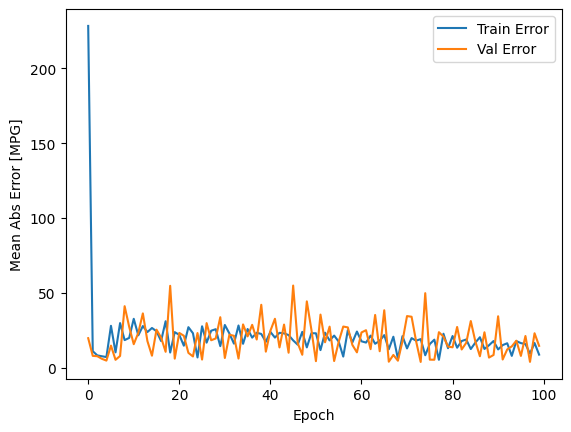

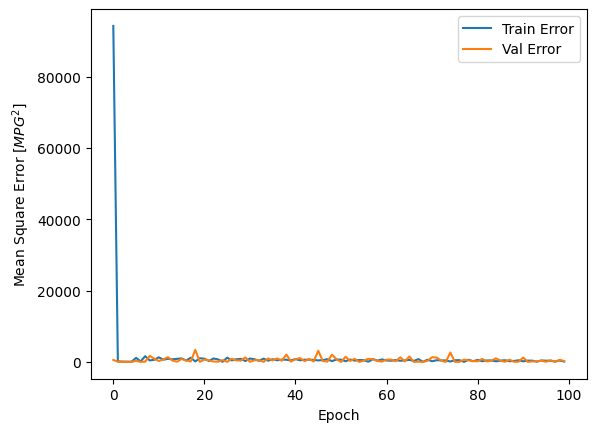

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 64)                576       
                                                                 
 dense_59 (Dense)            (None, 64)                4160      
                                                                 
 dense_60 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2/2 - 0s - loss: 246.9915 - mae: 14.7836 - mse: 246.9915 - 25ms/epoch - 12ms/step


MAE para las predicciones en el conjunto de prueba: 14.7836 MPG
2/2 [==============================] - 0s 5ms/step


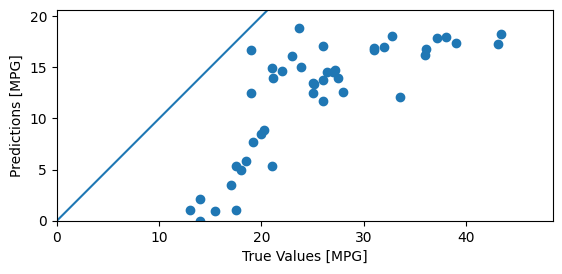

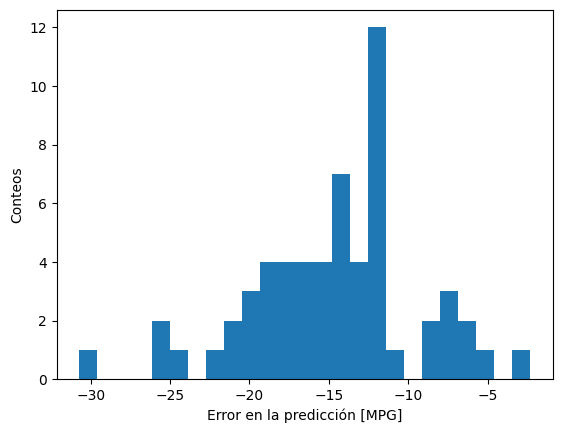

In [ ]:
# MODELO SIN DATOS NORMALIZADOS Y SIN ACTIVACIÓN FINAL

model_me = build_model(None, X_train)

EPOCHS = 100

history = model_me.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0)

plot_history(history)
model_me.summary()

loss, mae, mse = model_me.evaluate(X_test, y_test, verbose=2)

print(f"MAE para las predicciones en el conjunto de prueba: {np.round(mae,4)} MPG")

y_pred = model_me.predict(X_test).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Error en la predicción [MPG]")
plt.ylabel("Conteos")
plt.show()

2. Repite el entrenamiendo del modelo usando 100 épocas, normalización de los datos y **con alguna función de activación en la capa de salida (tanh o sigmoide)**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento? \
**R:** Las métricas dan un resultado peor al modelo 1, pero las curvas convergen

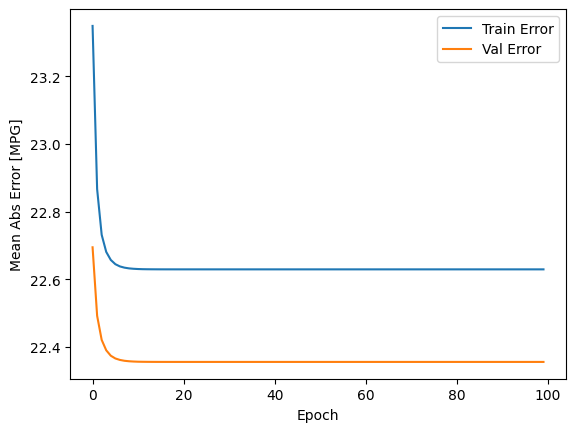

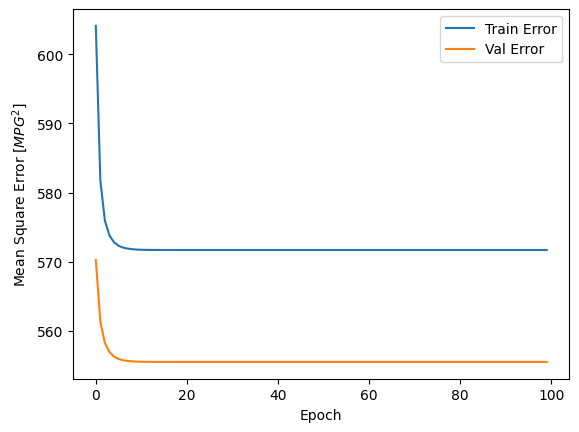

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 64)                576       
                                                                 
 dense_77 (Dense)            (None, 64)                4160      
                                                                 
 dense_78 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2/2 - 0s - loss: 534.4680 - mae: 21.5237 - mse: 534.4680 - 27ms/epoch - 14ms/step
MAE para las predicciones en el conjunto de prueba: 21.5237 MPG
2/2 [==============================] - 0s 4ms/step


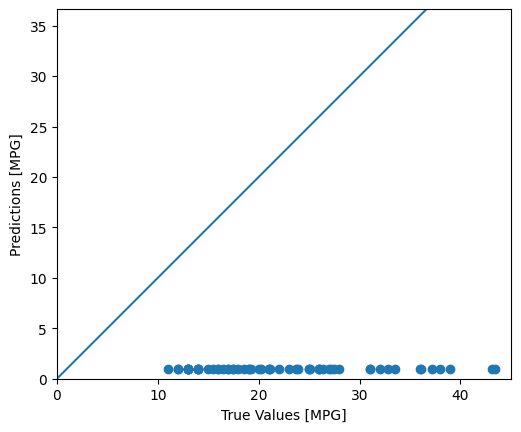

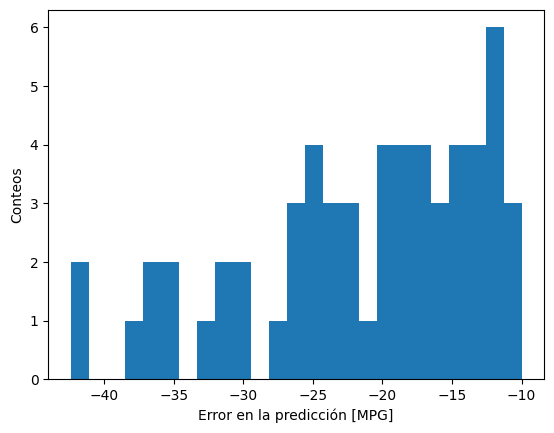

In [ ]:
# MODELO CON DATOS NORMALIZADOS Y ACTIVACIÓN FINAL TANH

model_tan = build_model('tanh', X_train_scl)

EPOCHS = 100

history = model_tan.fit(X_train_scl, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0)

plot_history(history)
model_tan.summary()

loss, mae, mse = model_tan.evaluate(X_test_scl, y_test, verbose=2)

print(f"MAE para las predicciones en el conjunto de prueba: {np.round(mae,4)} MPG")

y_pred = model_tan.predict(X_test_scl).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Error en la predicción [MPG]")
plt.ylabel("Conteos")
plt.show()

3. Repite el entrenamiendo del modelo usando 100 épocas, normalización de los datos y **con la función de activación ReLU en la capa de salida**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento? \
**R:** Las métricas dan un mejor resultado y las curvas convergen

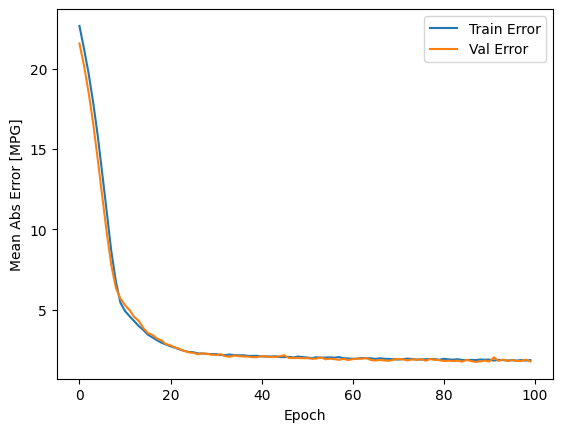

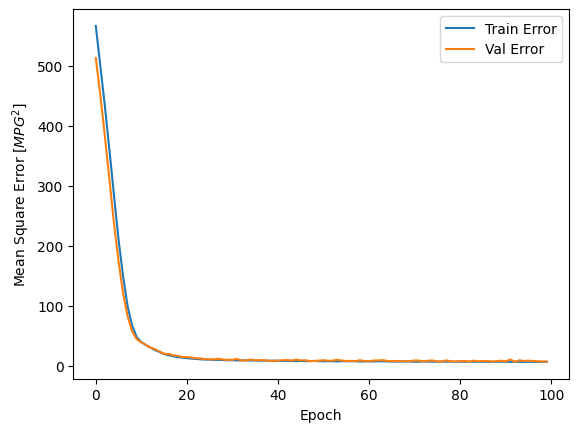

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 64)                576       
                                                                 
 dense_74 (Dense)            (None, 64)                4160      
                                                                 
 dense_75 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2/2 - 0s - loss: 6.8044 - mae: 1.8837 - mse: 6.8044 - 24ms/epoch - 12ms/step
MAE para las predicciones en el conjunto de prueba: 1.8837 MPG
2/2 [==============================] - 0s 4ms/step


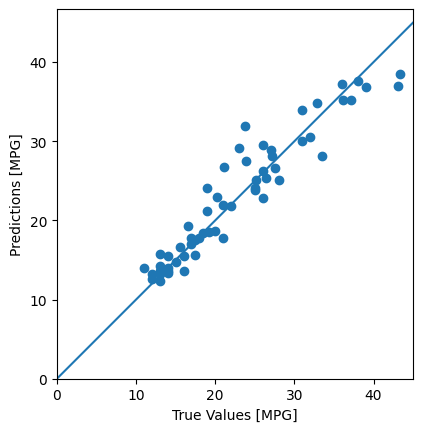

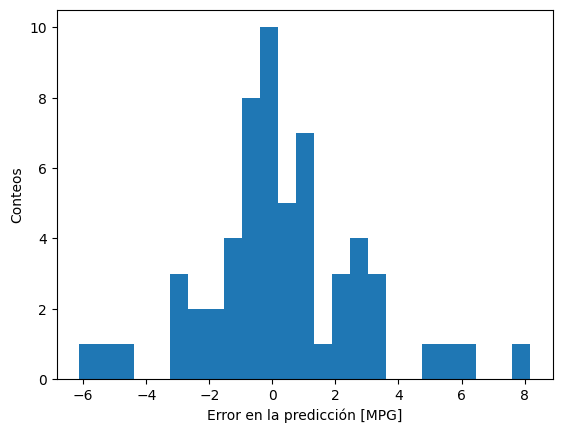

In [ ]:
# MODELO CON DATOS NORMALIZADOS Y ACTIVACIÓN FINAL relu

model_relu = build_model('relu', X_train_scl)

EPOCHS = 100

history = model_relu.fit(X_train_scl, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0)

plot_history(history)
model_relu.summary()

loss, mae, mse = model_relu.evaluate(X_test_scl, y_test, verbose=2)

print(f"MAE para las predicciones en el conjunto de prueba: {np.round(mae,4)} MPG")

y_pred = model_relu.predict(X_test_scl).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Error en la predicción [MPG]")
plt.ylabel("Conteos")
plt.show()

4. Comprueba el modelo que entrenamos en la notebook (con 100 épocas, normalización y sin función de activación en la salida) con los siguientes algoritmos de ML clásico:
 * Regresión Lineal
 * Regresión Polinomial
 * Regresor KNN
 Comprueba los modelos usando MAE en el conjunto de prueba. ¿Cuál tuvo mejor desempeño? \

**R:** El modelo de Red Nueronal fue el mejor

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

model_me = build_model(None, X_train_scl)

EPOCHS = 100

history = model_me.fit(X_train_scl, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0)

# Evaluar el modelo de red neuronal en el conjunto de prueba
nn_predictions = model_me.predict(X_test_scl)
nn_mae = mean_absolute_error(y_test, nn_predictions)
print(f"Neural Network MAE: {nn_mae}")

# Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scl, y_train)
lr_predictions = lr_model.predict(X_test_scl)
lr_mae = mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression MAE: {lr_mae}")

# Regresión Polinomial (grado 2)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scl)
X_test_poly = poly_features.transform(X_test_scl)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_predictions = poly_model.predict(X_test_poly)
poly_mae = mean_absolute_error(y_test, poly_predictions)
print(f"Polynomial Regression (degree 2) MAE: {poly_mae}")

# Regressor KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scl, y_train)
knn_predictions = knn_model.predict(X_test_scl)
knn_mae = mean_absolute_error(y_test, knn_predictions)
print(f"KNN Regressor MAE: {knn_mae}")

# Comparar los resultados
results = {
    'Red neuronal': nn_mae,
    'Regresión Lineal': lr_mae,
    'Regresión Polinomial': poly_mae,
    'Regresión KNN': knn_mae
}
print("--------")
best_model = min(results, key=results.get)
print(f"El modelo con el MAE más bajo es: {best_model} con un MAE de {results[best_model]}")

2/2 [==============================] - 0s 12ms/step
Neural Network MAE: 2.063154876838296
Linear Regression MAE: 2.924186600165399
Polynomial Regression (degree 2) MAE: 2.3346133474576276
KNN Regressor MAE: 2.413898305084746
--------
El modelo con el MAE más bajo es: Red neuronal con un MAE de 2.063154876838296


5. Usando los datos normalizados, prueba con diferentes combinaciones de los parámetros del módelo:
    * Número de capas ocultas
    * Número de nueronas en las capas ocultas
    * Funciones de activación de las capas ocultas
    * Optimizador y tasa de entrenamiento

 Puedes hacer el modelo más sencillo o más complejo. Reporta la combinación de parámetros que produjo el mejor resultado.

**R:** Se reportó que la combinación que produjo el mejor resultado fue 'layers': [64, 64], 'activation': 'tanh', 'optimizer': 'Adam', 'learning_rate': 0.01, 'mae': 1.677

In [9]:
np.random.seed(189)
tf.random.set_seed(189)

def build_and_evaluate_model(layers_config, activation, optimizer, learning_rate, X_train, y_train, X_test, y_test, epochs=100):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))

    for neurons in layers_config:
        model.add(layers.Dense(neurons, activation=activation))

    model.add(layers.Dense(1, activation=None))

    opt = optimizer(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='mse', metrics=['mae', 'mse'])

    history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, verbose=0)
    loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)

    return mae

# Configuraciones de hiperparámetros a probar
layer_configs = [
    [32, 32],
    [64, 64],
    [64, 32, 16],
    [128, 64, 32],
    [128, 128, 64, 32]
]

activations = ['relu', 'tanh']
optimizers = [tf.keras.optimizers.Adam, tf.keras.optimizers.RMSprop]
learning_rates = [0.001, 0.01]

# Realizar la búsqueda de hiperparámetros
results = []
for layers_config in layer_configs:
    for activation in activations:
        for optimizer in optimizers:
            for lr in learning_rates:
                mae = build_and_evaluate_model(layers_config, activation, optimizer, lr, X_train_scl, y_train, X_test_scl, y_test)
                results.append({
                    'layers': layers_config,
                    'activation': activation,
                    'optimizer': optimizer.__name__,
                    'learning_rate': lr,
                    'mae': mae
                })
                print(f"Config: layers={layers_config}, activation={activation}, optimizer={optimizer.__name__}, lr={lr}, MAE={mae}")

# Encontrar la mejor configuración
best_result = min(results, key=lambda x: x['mae'])
print(f"Best Configuration: {best_result}")

Config: layers=[32, 32], activation=relu, optimizer=Adam, lr=0.001, MAE=2.0392158031463623
Config: layers=[32, 32], activation=relu, optimizer=Adam, lr=0.01, MAE=1.75310480594635
Config: layers=[32, 32], activation=relu, optimizer=RMSprop, lr=0.001, MAE=2.015380382537842
Config: layers=[32, 32], activation=relu, optimizer=RMSprop, lr=0.01, MAE=2.6807825565338135
Config: layers=[32, 32], activation=tanh, optimizer=Adam, lr=0.001, MAE=3.5015501976013184
Config: layers=[32, 32], activation=tanh, optimizer=Adam, lr=0.01, MAE=1.8960739374160767
Config: layers=[32, 32], activation=tanh, optimizer=RMSprop, lr=0.001, MAE=3.40423846244812
Config: layers=[32, 32], activation=tanh, optimizer=RMSprop, lr=0.01, MAE=2.0063273906707764
Config: layers=[64, 64], activation=relu, optimizer=Adam, lr=0.001, MAE=1.987024188041687
Config: layers=[64, 64], activation=relu, optimizer=Adam, lr=0.01, MAE=1.9733067750930786
Config: layers=[64, 64], activation=relu, optimizer=RMSprop, lr=0.001, MAE=2.008843421936

En esta última tarea probaras cómo es recibir nuevos datos para realizar predicciones con tu mejor modelo que hayas obtenido.

6. Ya que tengas tu mejor modelo, toma el archivo `mpg_new_data.csv` del repositorio y obten las predicciones para estos datos. Compararemos contra los valores reales. **Guarda estas predicciones en un archivo CSV, que también adjuntarás en la entrega de la actividad**

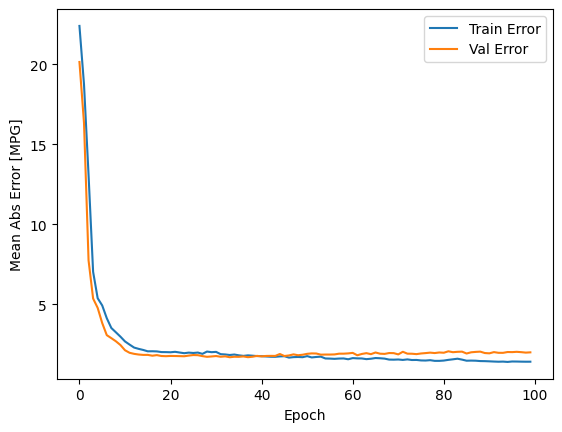

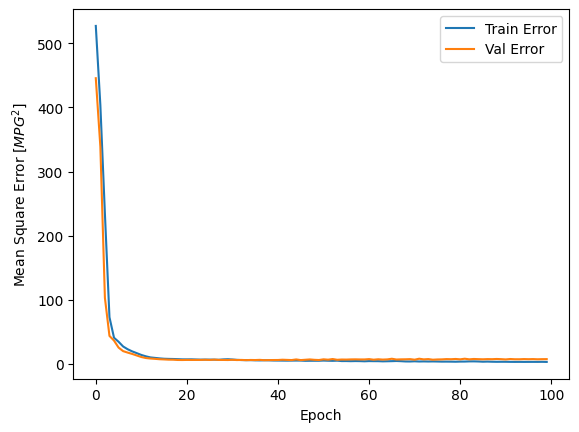

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________
MAE:  1.6549935340881348
2/2 [==============================] - 0s 2ms/step


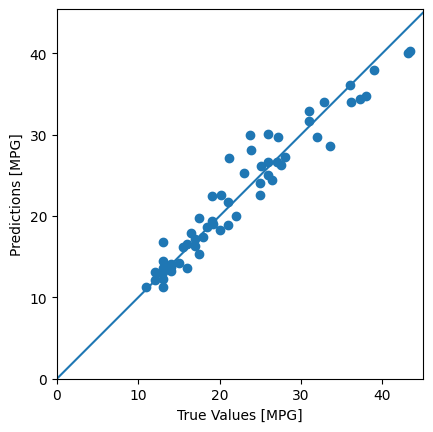

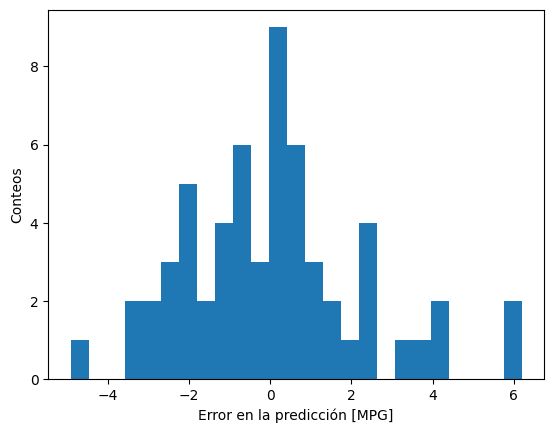

In [5]:
np.random.seed(189)
tf.random.set_seed(189)

def best_model():
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_scl.shape[1],)))
    model.add(layers.Dense(64, activation= 'tanh'))
    model.add(layers.Dense(64, activation= 'tanh'))
    model.add(layers.Dense(1, activation=None))

    optimizer = tf.keras.optimizers.Adam(0.01)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

model_best = best_model()


history = model_best.fit(X_train_scl, y_train, epochs=100, validation_split=0.2, verbose=0)
loss, mae, mse = model_best.evaluate(X_test_scl, y_test, verbose=0)

plot_history(history)
model_best.summary()

print("MAE: ", mae)
y_pred = model_best.predict(X_test_scl).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Error en la predicción [MPG]")
plt.ylabel("Conteos")
plt.show()


In [6]:
df_new = pd.read_csv('mpg_new_data.csv')
df_new = df_new.drop(columns=['Origin', 'Unnamed: 0'])
df_new['Europa'] = [0, 0]
df_new['Japan'] = [0, 0]

df_new_scl = scaler.fit_transform(df_new)
print(df_new)
y_pred = model_best.predict(df_new_scl).flatten()

df_new['MPG'] = np.round(y_pred)
df.to_csv('mpg_new_pred_data.csv', index=False)
df_new

   Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
0          4           120          79    2625          18.6          82   
1          4           119          82    2720          19.4          82   

   Europa  Japan  
0       0      0  
1       0      0  
1/1 [==============================] - 0s 16ms/step


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europa,Japan,MPG
0,4,120,79,2625,18.6,82,0,0,35.0
1,4,119,82,2720,19.4,82,0,0,17.0
